#กำหนด Path ที่จะทำงานใน Colab

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


#ติดตั้ง Library ที่จำเป็น

In [2]:
!pip install ultralytics==8.2.103 -q
!pip install roboflow -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.1/875.1 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

# สร้าง Folder รองรับ Dataset

In [3]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


#โหลด Dataset จาก Roboflow

In [4]:

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="sk1gIjJo6Xyw8Jl1YyZG")
project = rf.workspace("ai-traning-6tzh6").project("accident-severity-detection-dataset-fuvym")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Accident-Severity-Detection-Dataset-1 in yolov8:: 100%|██████████| 2456/2456 [00:00<00:00, 5402.72it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


#  Train Model Yolo ด้วย Dataset ที่เตรียมไว้

In [5]:
import ultralytics
from ultralytics import YOLO
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 161MB/s]
New https://pypi.org/project/ultralytics/8.3.84 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Accident-Severity-Detection-Dataset-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=Fal

#แสดงผลลัพธ์จากการ Train Model

## เตรียมฟังก์ชั่น แสดงรูปภาพ

In [6]:
import matplotlib.pyplot as plt
import cv2
import os

# ฟังก์ชันแสดงภาพด้วย matplotlib
def display_image(image_path, figsize=(10, 10)):
    """แสดงภาพโดยใช้ matplotlib"""
    if not os.path.exists(image_path):
        print(f"ไม่พบไฟล์ที่ {image_path}")
        return
    # โหลดภาพ
    image = cv2.imread(image_path)  # โหลดภาพด้วย OpenCV
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # แปลงสี BGR เป็น RGB
    # แสดงผลภาพ
    plt.figure(figsize=figsize)
    plt.imshow(image)
    plt.axis('off')  # ปิดแกน
    plt.show()

##แสดง Confusion Metrix

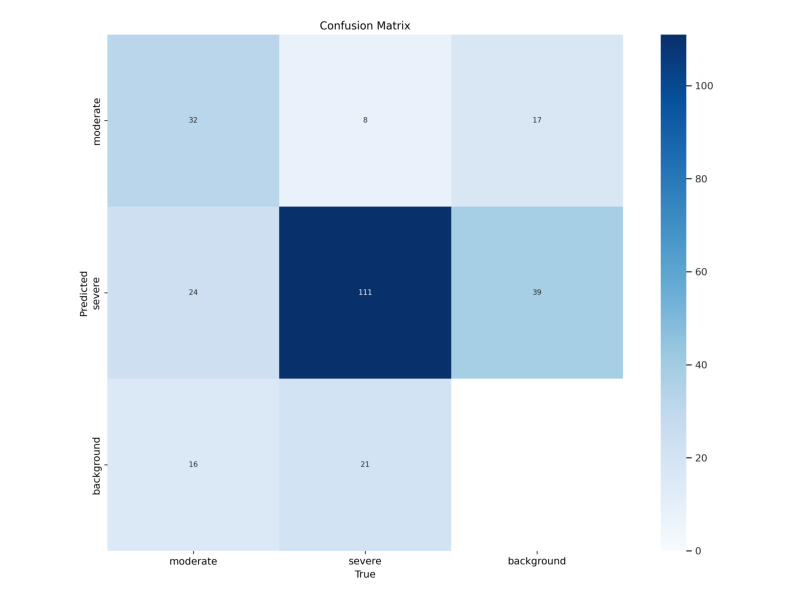

In [7]:
# เส้นทางไฟล์ภาพ confusion_matrix
image_path = f"{HOME}/runs/detect/train/confusion_matrix.png"
# เรียกใช้ฟังก์ชันแสดงภาพ
display_image(image_path)

##แสดงภาพตัวอย่างที่ทำนายแล้ว จากการ Valid

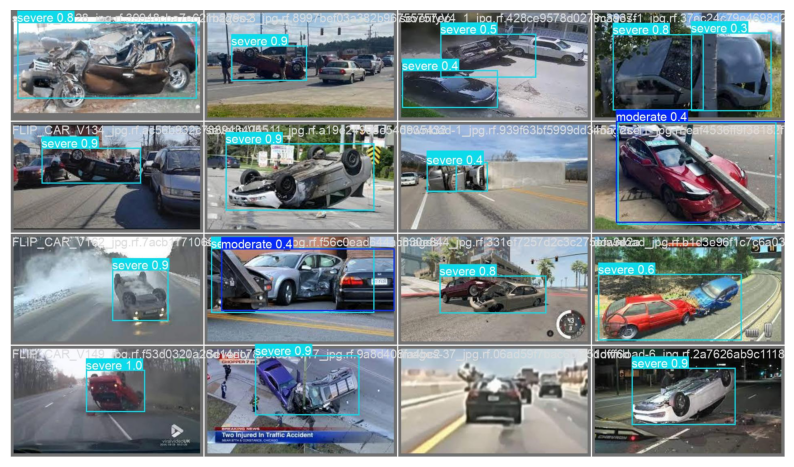

In [11]:
# เส้นทางไฟล์ภาพจากการ Valid
image_path = f'{HOME}/runs/detect/train/val_batch0_pred.jpg'
# เรียกใช้ฟังก์ชันแสดงภาพ
display_image(image_path)

#ดาวน์โหลด Model ไปใช้

In [12]:
from google.colab import files
# ระบุเส้นทางของไฟล์ที่ต้องการดาวน์โหลด
file_path = '/content/runs/detect/train/weights/best.pt'
# ดาวน์โหลดไฟล์
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# การนำโมเดลที่สำเร็จแล้วมาใช้ (ใน Colab)

In [8]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
from google.colab import files
import os

## อัพโหลดไฟล์รูปที่ต้องการค้นหาวัตถุ

In [17]:

uploaded = files.upload()  # เรียกใช้ตัวอัพโหลดรูปของ Colab
if not uploaded:
    raise FileNotFoundError("No file uploaded!")
test_image_path = next(iter(uploaded.keys()))  # เก็บชื่อไฟล์เข้าสู่ตัวแปร

Saving 1095245-untitled.webp to 1095245-untitled.webp


## เรียกใช้โมเดลที่ Train ไว้แล้ว

In [22]:
# โหลดโมเดล best
model_path = "best.pt"
if not os.path.exists(model_path):
    raise FileNotFoundError(f"YOLO model file not found at {model_path}")
model = YOLO(model_path)

## อ่านภาพที่อัพโหลดผ่าน Model

In [23]:
# โหลดภาพด้วย OpenCV
image = cv2.imread(test_image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {test_image_path}")

# แปลงรูปสีเป็นขาวดำ
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# ส่งภาพเข้าโมเดล
results = model(image)


0: 480x800 1 moderate, 41.3ms
Speed: 3.6ms preprocess, 41.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


## ตีกรอบ (Bounding Box) วัตถุจากผลลัพธ์ของ Model

In [24]:
for result in results:
    boxes = result.boxes.cpu().numpy()  # แปลงตำแหน่ง Bounding Box ให้อยู่ในรูปแบบ NumPy array
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]  # ดึงค่าพิกัด Bounding Box (มุมซ้ายบนและมุมขวาล่าง)
        confidence = box.conf[0]  # ดึงค่าความเชื่อมั่นวัตถุ
        cls = int(box.cls[0])  # ดึงค่า class id ของวัตถุที่ตรวจจับได้
        if confidence > 0.5:  # กรองเฉพาะวัตถุที่มีเชื่อมั่นมากกว่า 50%
            label = f"{model.names[cls]} {confidence:.2f}"  # สร้างข้อความแสดงชนิดของวัตถุและค่าความเชื่อมั่น
            # ตีกรอบ (สีแดงและความหนา 3 พิกเซล)
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 3)
            # เขียนข้อความ label
            cv2.putText(image,label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

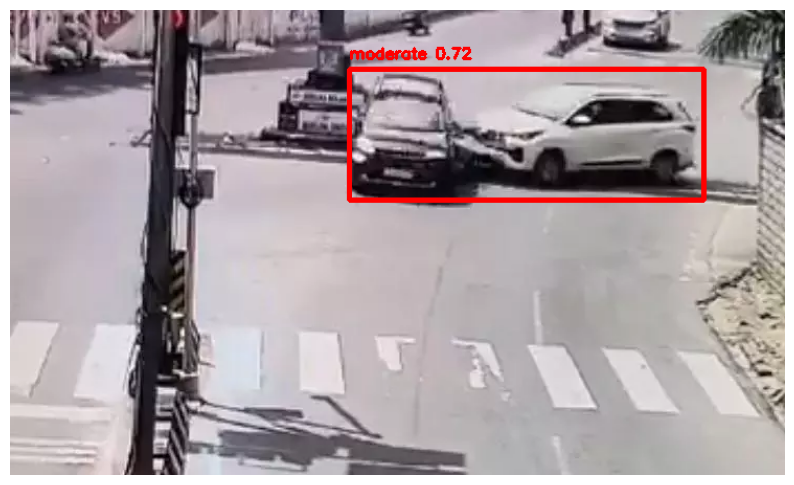

In [25]:
# Display the resulting image using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")
plt.show()